In [17]:
import pandas as pd
import cv2
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.cluster import KMeans

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Importing Data

In [3]:
import pickle
data = {}
with open('/content/gdrive/MyDrive/Mini Project/data', 'rb') as handle:
  data = pickle.load(handle)

In [4]:
samples = data['samples']

In [5]:
samples = np.array(samples)
samples.shape

(4300, 3072)

In [6]:
samples

array([[123, 167, 190, ..., 242, 233, 219],
       [  5,   5,   5, ...,  39,  85,  92],
       [ 20,  14,  18, ..., 198, 202, 202],
       ...,
       [126, 132, 140, ...,  18,  23,  21],
       [200, 211, 219, ...,  35,  38,  43],
       [ 17,  61, 159, ..., 154, 201, 229]], dtype=uint8)

In [7]:
dic = {}
for i in range(samples.shape[1]):
  dic[i] = samples.T[i]
df = pd.DataFrame(dic)
df['labels'] = np.array(data['labels'])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3033,3034,3035,3036,3037,3038,3039,3040,3041,3042,3043,3044,3045,3046,3047,3048,3049,3050,3051,3052,3053,3054,3055,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071,labels
0,123,167,190,120,167,191,110,148,172,91,114,142,83,93,125,83,82,120,73,74,112,55,60,101,70,76,121,90,100,146,114,117,165,118,126,172,112,122,168,103,...,138,169,197,127,156,191,100,131,177,89,124,173,92,123,169,94,123,169,78,102,149,80,101,138,132,147,168,192,191,202,218,211,209,233,219,215,242,233,219,0
1,5,5,5,7,12,11,15,23,22,8,25,22,9,23,21,15,28,26,15,26,25,9,20,18,14,25,23,19,30,28,11,24,20,7,18,16,8,17,17,14,...,121,163,205,116,160,197,99,144,177,79,123,160,77,119,161,89,129,178,100,139,191,101,138,196,100,137,193,97,139,184,79,135,161,56,108,124,39,85,92,0
2,20,14,18,32,22,25,33,22,29,22,17,18,28,22,19,46,38,33,51,40,37,36,24,26,37,32,33,71,68,69,100,94,95,94,90,89,52,44,41,32,...,54,48,54,83,82,91,113,116,123,146,146,158,161,162,176,178,179,192,180,184,195,185,193,205,192,201,211,195,204,213,198,208,215,202,203,207,198,202,202,0
3,30,33,44,31,32,42,28,30,38,34,37,45,35,46,45,37,47,47,44,55,57,50,62,64,59,68,71,68,80,84,71,87,93,77,95,102,66,83,93,78,...,126,131,214,141,149,230,156,166,244,142,154,232,135,149,231,136,153,246,125,149,245,129,159,242,140,173,244,64,93,149,20,46,91,43,68,110,78,109,151,0
4,63,90,126,49,71,113,44,66,109,47,68,111,39,57,104,41,62,109,43,69,119,54,93,142,78,113,166,82,117,169,84,115,165,42,67,113,27,48,95,45,...,131,144,182,128,143,181,126,144,181,124,143,181,125,147,182,128,152,188,124,147,185,112,135,173,99,116,154,87,93,131,72,77,107,29,33,58,14,15,34,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4295,227,200,182,212,184,167,200,171,156,195,169,154,211,185,172,192,165,153,178,152,140,106,81,70,64,41,29,117,94,84,131,108,99,64,42,34,46,25,18,45,...,34,31,30,33,29,28,45,44,43,46,44,43,53,51,50,52,50,50,56,54,58,28,35,45,70,89,109,197,227,255,173,214,254,170,213,255,185,218,254,1
4296,102,93,225,125,115,239,143,131,243,158,142,241,165,147,238,189,173,255,180,166,252,143,130,221,146,131,220,169,149,241,138,120,214,152,146,221,161,165,217,158,...,122,126,165,111,107,151,117,108,150,127,113,161,160,147,216,49,45,155,79,78,224,136,129,254,195,187,249,222,219,241,232,230,235,243,237,248,248,237,255,1
4297,126,132,140,135,141,147,96,102,107,178,184,189,238,245,249,215,221,226,197,206,213,185,195,204,196,207,217,198,209,224,192,205,220,193,208,224,189,210,229,175,...,107,127,167,104,128,167,95,120,164,84,111,154,80,105,146,84,106,140,80,102,130,84,101,122,41,52,66,11,19,26,8,16,16,12,17,17,18,23,21,1
4298,200,211,219,190,202,210,178,191,199,186,198,209,178,191,203,145,161,173,117,133,148,110,124,142,115,130,150,129,147,169,142,157,182,144,160,187,138,155,182,144,...,170,174,174,166,171,170,162,167,166,160,164,165,162,167,170,164,171,174,169,178,181,140,148,152,90,95,100,39,42,47,14,18,23,22,26,31,35,38,43,1


In [8]:
df.sample(frac=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3033,3034,3035,3036,3037,3038,3039,3040,3041,3042,3043,3044,3045,3046,3047,3048,3049,3050,3051,3052,3053,3054,3055,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071,labels
767,6,12,19,12,18,23,19,27,31,15,24,37,22,37,54,23,34,58,28,40,63,22,35,60,34,48,77,33,50,79,36,55,87,34,54,93,56,75,122,68,...,78,102,147,61,84,136,64,95,148,87,120,174,76,111,155,83,117,153,85,115,145,101,130,152,158,184,200,157,178,193,171,188,201,170,186,199,169,185,197,0
1198,21,39,66,19,39,65,18,40,62,20,38,60,24,41,60,26,45,62,25,45,60,37,56,71,42,58,74,41,55,78,49,65,89,49,69,98,59,82,110,74,...,164,177,204,170,178,200,200,206,214,223,225,225,233,231,223,238,233,222,237,236,218,238,234,222,233,234,225,228,230,224,230,231,227,238,236,235,241,237,236,0
3326,29,31,32,17,18,19,12,13,14,12,12,12,15,12,13,20,15,17,17,14,17,19,21,22,22,22,22,35,35,35,47,45,44,51,50,51,38,40,40,40,...,240,242,237,254,255,251,245,244,240,231,228,223,228,226,218,228,229,219,236,240,229,229,228,219,217,218,218,179,192,200,173,193,214,168,191,223,176,198,238,1
676,30,38,55,39,45,68,51,61,75,69,75,88,91,96,104,103,106,113,102,105,114,95,98,106,88,91,99,93,95,104,83,89,96,77,84,97,76,85,94,81,...,206,210,229,200,197,227,186,178,212,158,141,189,146,123,173,148,118,174,164,126,181,177,140,190,187,146,190,181,149,181,170,140,169,148,117,149,122,94,149,0
2152,35,34,56,55,55,79,55,55,85,40,40,67,53,54,75,48,49,70,48,48,71,43,44,65,33,36,54,41,45,63,31,35,52,56,61,76,53,56,70,40,...,35,28,31,32,27,23,37,30,20,32,30,33,57,64,80,101,111,148,101,106,155,104,109,163,111,125,173,132,149,184,153,167,186,175,183,190,213,223,211,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,71,77,84,42,48,47,25,31,26,18,25,20,22,23,22,23,22,22,33,34,32,47,48,46,48,45,44,48,42,42,52,47,48,50,44,45,48,44,44,59,...,55,77,117,48,67,104,44,62,92,39,51,78,50,61,79,133,143,159,182,186,201,171,173,184,175,179,186,185,189,194,177,184,190,172,182,189,180,183,191,0
1824,14,1,2,15,3,3,16,4,7,17,3,10,12,2,6,18,1,8,17,2,11,19,4,15,28,13,23,24,11,24,12,4,17,15,9,24,21,11,29,23,...,124,140,174,116,129,162,110,121,156,106,111,150,79,80,118,69,58,89,33,21,36,37,11,22,51,20,21,53,21,16,50,21,21,50,21,25,48,22,22,0
423,82,80,89,74,76,80,75,77,81,65,68,73,62,67,70,69,75,79,78,80,90,86,92,102,97,105,117,93,101,115,72,81,96,61,73,90,69,83,101,69,...,14,31,51,5,12,30,12,13,19,12,11,11,10,10,16,10,13,17,14,20,20,28,29,31,24,24,30,29,31,33,14,17,21,29,32,37,26,28,36,0
1452,21,17,23,22,18,24,18,16,22,21,19,24,25,24,29,27,27,32,26,30,34,29,32,39,31,33,40,34,34,45,33,39,58,42,51,72,54,60,80,56,...,138,168,196,151,176,199,145,167,184,194,205,215,210,214,211,223,221,220,228,223,221,225,223,225,228,227,227,220,212,212,151,142,138,207,198,189,225,218,209,0


Analyzing Data

In [10]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3033,3034,3035,3036,3037,3038,3039,3040,3041,3042,3043,3044,3045,3046,3047,3048,3049,3050,3051,3052,3053,3054,3055,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071,labels
count,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.00000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,...,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000
mean,70.185349,69.479535,76.637674,65.902093,64.970930,72.519302,63.225581,62.236744,70.139070,61.155581,60.345116,68.647674,60.343488,59.894884,68.787209,60.769535,60.71907,70.353256,62.521395,63.012326,73.575814,63.759070,64.854186,76.325581,65.724651,67.372791,79.752558,67.622093,69.792093,82.974419,69.724884,72.305116,86.241163,71.974651,74.892558,89.433488,73.722326,76.979767,91.980465,74.609535,...,106.826512,114.846977,135.945581,105.115116,113.120698,134.042558,104.084651,112.123256,132.734186,103.083488,111.189070,131.751163,102.102558,110.065349,130.388605,102.022326,109.587674,129.482791,100.515581,107.688837,126.945349,100.013721,106.650698,125.131395,100.501628,106.646279,124.267442,99.984186,105.545116,122.295116,100.076279,105.171628,120.870930,101.476279,106.107209,120.797442,102.560000,106.649535,120.503256,0.500000
std,62.545874,62.714700,65.052150,59.241950,59.302355,62.256000,56.623028,56.654368,60.077768,54.535069,54.660839,58.694123,53.750762,54.060735,58.710459,53.490955,54.26523,59.535506,54.389498,55.669459,61.335491,54.704774,56.626804,62.909133,55.838196,58.208222,65.095779,56.672081,59.440882,66.839886,57.475356,60.381893,68.074609,58.230926,61.393264,69.309273,58.609678,61.896749,70.033642,58.627834,...,61.922320,63.019441,70.384075,62.000176,63.240011,70.708983,62.481017,63.644520,70.858812,63.131028,64.604948,71.576430,64.268463,65.737689,72.305871,65.759159,67.205060,73.271630,67.105698,68.703762,74.715639,69.000771,70.863152,76.649046,70.473913,72.262437,77.615661,72.094942,73.874431,78.571721,73.633162,75.346666,79.425082,75.083451,76.834841,80.410017,76.212841,77.852795,81.006705,0.500058
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,25.000000,29.000000,24.000000,24.000000,28.000000,25.000000,24.000000,28.000000,24.000000,24.000000,28.000000,23.000000,23.000000,27.750000,24.000000,24.00000,28.000000,24.000000,24.000000,29.000000,25.000000,25.000000,30.000000,25.000000,25.000000,31.000000,26.000000,26.750000,32.000000,27.000000,27.000000,33.000000,28.

In [11]:
df.isnull().any()

0         False
1         False
2         False
3         False
4         False
          ...  
3068      False
3069      False
3070      False
3071      False
labels    False
Length: 3073, dtype: bool

In [13]:
df['labels'].value_counts()

1    2150
0    2150
Name: labels, dtype: int64

<BarContainer object of 2 artists>

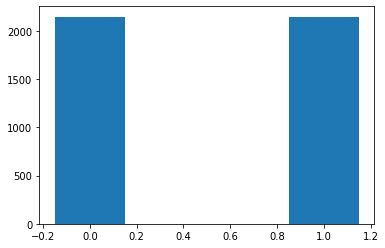

In [16]:
plt.bar([0,1], df['labels'].value_counts(), width = 0.3)

Spliting Data

In [116]:
X = df.iloc[:,:-1]
Y = df['labels']
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.5 ,random_state=0)

In [117]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2150, 3072)
(2150, 3072)
(2150,)
(2150,)


In [118]:
y_train.value_counts(normalize=True)

1    0.517674
0    0.482326
Name: labels, dtype: float64

Training on default Parameters

In [ ]:
svc = SVC(C=1)
svc.fit(x_train,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svc.score(x_test,y_test)

0.9618604651162791

In [ ]:
knc = KNeighborsClassifier()
knc.fit(x_train,y_train)
knc.score(x_test,y_test)

0.8916279069767442

In [ ]:
mlp = MLPClassifier()
mlp.fit(x_train.to_numpy()/255,y_train)
mlp.score(x_test.to_numpy()/255,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9604651162790697

Hyperparameter Tuning

In [ ]:
parameters = {
    'kernel':['linear', 'poly', 'rbf'],
    'C': [ 0.01, 0.1, 1, 3, 5, 10, 15, 20, 30 ],
}
svc = SVC()
grid_search = GridSearchCV(svc, parameters,cv=5)

In [ ]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 3, 5, 10, 15, 20, 30],
                         'kernel': ['linear', 'poly', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
grid_search.best_params_

{'C': 10, 'kernel': 'rbf'}

In [ ]:
best_svc = grid_search.best_estimator_

In [ ]:
best_svc.score(x_test,y_test)

0.967906976744186

In [65]:
print('Number of Support Vectors in best model : ',best_svc.n_support_)

Number of Support Vectors in best model :  [352 331]


In [63]:
parameters = {
    'n_neighbors':[3, 5, 7, 10, 15 , 20],
    'leaf_size':[20,30,45],
}
knc = KNeighborsClassifier()
grid_search = GridSearchCV(knc, parameters,cv=5)

In [66]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'leaf_size': [20, 30, 45],
                         'n_neighbors': [3, 5, 7, 10, 15, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [67]:
grid_search.best_params_

{'leaf_size': 20, 'n_neighbors': 3}

In [68]:
best_knc = grid_search.best_estimator_

In [69]:
best_knc.score(x_test,y_test)

0.9004651162790698

In [80]:
parameters = {
    'hidden_layer_sizes':[(512,128,64),(512,256,128),(512,512,256)],
    'learning_rate': ['invscaling','adaptive'],
    'learning_rate_init': [0.05],
}
mlp = MLPClassifier(max_iter=1000)
grid_search = GridSearchCV(mlp, parameters,cv=5)

In [81]:
grid_search.fit(x_train.to_numpy()/255,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=1000, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_stat...ffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'hidde

In [82]:
grid_search.best_params_

{'hidden_layer_sizes': (512, 128, 64),
 'learning_rate': 'invscaling',
 'learning_rate_init': 0.05}

In [83]:
best_mlp = grid_search.best_estimator_

In [119]:
best_mlp.score(x_test.to_numpy()/255,y_test)

0.8865116279069768

This score does not beat the score obtained from default parameters of MLP.



---

Results

In [86]:
y_pred = best_svc.predict(x_test)

F1 Score from best classifier with best parameters.

In [88]:
f1_score(y_test,y_pred)

0.9665211062590975

Precision from best classifier with best parameters.

In [90]:
precision_score(y_test,y_pred)

0.97265625

Recall from best classifier with best parameters.

In [92]:
recall_score(y_test,y_pred)

0.9604628736740598

Accuracy from best classifier with best parameters.

In [93]:
best_svc.score(x_test, y_test)

0.967906976744186

Visualization and Testing On Real World Examples

In [146]:
def classify(i):
  img = cv2.imread('/content/gdrive/MyDrive/Mini Project/test/'+str(i)+'.jpg')
  img2 = cv2.resize(img, dsize=(32, 32), interpolation=cv2.INTER_CUBIC)
  img2 = np.array(img2)
  img2 = img2.flatten()
  y = best_svc.predict([img2])
  print(y)
  if y[0]==0:
    print('Without Mask')
  else: 
    print('With Mask')
  plt.imshow(img, interpolation = 'nearest')
  plt.axis('off')
  plt.show()

[0]
Without Mask


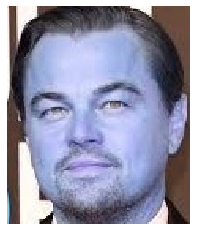

In [160]:
classify(1)

[0]
Without Mask


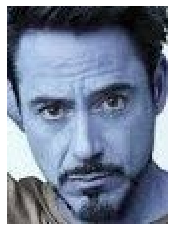

In [165]:
classify(2)

[1]
With Mask


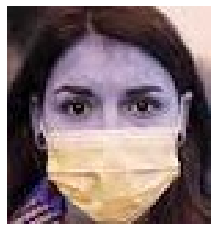

In [149]:
classify(3)

[1]
With Mask


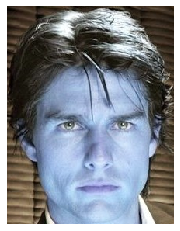

In [150]:
classify(4)

[1]
With Mask


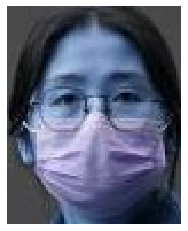

In [151]:
classify(5)

[1]
With Mask


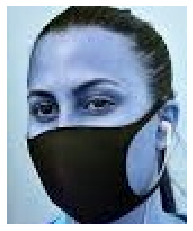

In [152]:
classify(6)

[0]
Without Mask


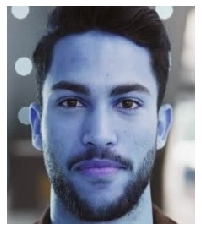

In [153]:
classify(7)

[1]
With Mask


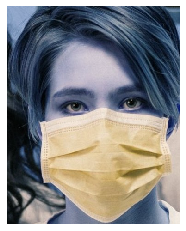

In [154]:
classify(8)

[0]
Without Mask


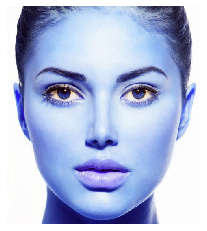

In [155]:
classify(9)

[1]
With Mask


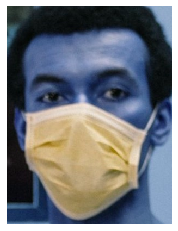

In [156]:
classify(10)